<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h1> A1 | Classification Modeling Development</h1>
<h2>DAT-5390 | Computational Data Analytics with Python</h2>

Ahmed Sabet - MBAN First Year <br>
Hult International Business School<br><br><br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Part I: Importing packages and Database</h2>


In [ ]:
#Importing Libraries
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns                 
import numpy as np                    
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
import sklearn.linear_model
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.linear_model import LogisticRegression 


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = r'C:\Users\Asabe\Downloads\Cross_Sell_Success_Dataset_2023.xlsx'


# reading the file into Python
cross_sell = pd.read_excel(file)

# Investigating the null values of the apprentice chef dataset
# looking at what features do we have
# and then
# summing together the results per column
cross_sell.isnull().sum(axis = 0)

#Validating that the Data has been Replaced Successfully
cross_sell.iloc[ 2 , :]



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>User-Defined Functions</strong><br>


In [ ]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


In [ ]:
#Train_Test Stratification

In [ ]:
#CHECKING THE CROSS SELLING 
# SUCCESS RATE
cross_sell.loc[ : ,'CROSS_SELL_SUCCESS'].value_counts(normalize = True).round(decimals = 2)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong>Feature Engineering New Features</strong><br>

In [ ]:

cross_sell ['USER_INTERACTION'] = (cross_sell['PC_LOGINS'] + cross_sell['MOBILE_LOGINS'] )/cross_sell['AVG_TIME_PER_SITE_VISIT']
cross_sell ['Custom_Orders'   ]   = (cross_sell['UNIQUE_MEALS_PURCH'] + cross_sell['PRODUCT_CATEGORIES_VIEWED']) / cross_sell['TOTAL_MEALS_ORDERED']
cross_sell ['Largest_To_Total' ] = cross_sell['LARGEST_ORDER_SIZE'] / cross_sell['TOTAL_MEALS_ORDERED']
cross_sell ['Weekly_Optins' ] = cross_sell['WEEKLY_PLAN']/cross_sell['TOTAL_MEALS_ORDERED']
cross_sell ['Avg Prep Per Meal'] = cross_sell['AVG_PREP_VID_TIME']/cross_sell['TOTAL_MEALS_ORDERED']
cross_sell ['Avg Time vs Orders'] = cross_sell['AVG_TIME_PER_SITE_VISIT']/cross_sell['TOTAL_MEALS_ORDERED']
cross_sell [ 'Ordered Meals Per Photo' ] = cross_sell['TOTAL_MEALS_ORDERED']/cross_sell['PRODUCT_CATEGORIES_VIEWED']
cross_sell ['Cancellation_Frequency']  = cross_sell ['CANCELLATIONS_AFTER_NOON']/ cross_sell['TOTAL_MEALS_ORDERED']
cross_sell ['Categories Frequency']  = cross_sell ['PRODUCT_CATEGORIES_VIEWED']/ cross_sell['AVG_TIME_PER_SITE_VISIT']
cross_sell ['Time to Unique Orders'] = cross_sell ['AVG_TIME_PER_SITE_VISIT']/cross_sell['UNIQUE_MEALS_PURCH']
cross_sell ['Largest order size to Total Pohots' ] = cross_sell['LARGEST_ORDER_SIZE'] / cross_sell['TOTAL_PHOTOS_VIEWED']
cross_sell ['Largest order size to Avg Time' ] = cross_sell['LARGEST_ORDER_SIZE'] / cross_sell['AVG_TIME_PER_SITE_VISIT']


In [ ]:
# creating a new column called 'LATE DELIVERIES' since the original has space in the title of the column
cross_sell['LATE_DELIVERIES'] = cross_sell.iloc[:, 13]

# delete original 'LATE_DELIVERIES ' column with space
cross_sell = cross_sell.drop(columns="LATE_DELIVERIES ")

In [ ]:
cross_sell['USER_INTERACTION']

<hr style="height:.35px;border:none;color:#333;background-color:#333;" /><br>


<strong>Feature Engineering Part 2</strong><br>

In [ ]:
#Instantiating a placegolder for Customers
#that rate orders greater than the average
cross_sell['High_Customer_Statisfaction'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'AVG_MEAN_RATING'] > 2.5:
        cross_sell.loc[index,'High_Customer_Statisfaction' ] = 1
    
    elif cross_sell.loc[index, 'AVG_MEAN_RATING'] < 2.5:
        cross_sell.loc[index,'High_Customer_Statisfaction' ] = 0

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Developing Email Classification</strong><br>


In [ ]:
#Classifying E-mails into Personal and Other
def classify_email(email):
    if any(domain in email for domain in ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com', 
                                          '@mmm.com', '@amex.com', '@apple.com', '@boeing.com', '@caterpillar.com', 
                                          '@chevron.com', '@cisco.com', '@cocacola.com', '@disney.com', '@dupont.com', 
                                          '@exxon.com', '@ge.org', '@goldmansacs.com', '@homedepot.com', '@ibm.com', 
                                          '@intel.com', '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com', 
                                          '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com', 
                                          '@unitedtech.com', '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']):
        return 0
    else:
        return 1

# add a new column "personal email" with 0 and 1 values
cross_sell['personal_email'] = cross_sell['EMAIL'].apply(classify_email)

In [ ]:
#Classifying E-mails into Personal and Other
def junk_email(email):
    if any(domain in email for domain in ['@me.com', '@aol.com', '@hotmail.com', '@live.com', '@msn.com', '@passport.com', 
                                          ]):
        return 1
    else:
        return 0

# add a new column "personal email" with 0 and 1 values
cross_sell['junk_email'] = cross_sell['EMAIL'].apply(junk_email)

In [ ]:
cross_sell['junk_email'].value_counts(normalize = True)

In [ ]:
# Create an empty list to store the classification results
TARGARYEN_FLAG = []

# Iterate over the elements in the EMAIL column
for email in cross_sell['EMAIL']:
    # Check if the email contains the substring "targaryen"
    if 'targaryen' in email:
        targaryen_flags.append(1)
    else:
        targaryen_flags.append(0)


In [ ]:
cross_sell['TARGARYEN_FLAG'].value_counts(normalize = False)

In [ ]:
# Create an empty list to store the classification results
TOP_COMPANY = []

# Iterate over the elements in the EMAIL column
for email in cross_sell['EMAIL']:
    # Check if the email contains any of the specified substrings
    if 'walmart' in email or 'apple' in email or 'ge' in email or 'goldmansachs' in email or 'caterpillar' in email or 'pg' in email:
        TOP_COMPANY.append(1)
    else:
        TOP_COMPANY.append(0)

# Add the classification results to the DataFrame as a new column
cross_sell['TOP_COMPANY_FLAG'] = TOP_COMPANY

In [ ]:
cross_sell['TOP_COMPANY_FLAG'].value_counts(normalize = False)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Developing Customer Activity Breakdown </strong><br>


In [ ]:
#Creating a code to classify the data into four different groups
#The four cohorts are based on the descriptive statistics above
#stackoverflow
cross_sell['cohorts'] = pd.cut(cross_sell['TOTAL_MEALS_ORDERED'] , 
bins=[0, 11, 39, 60, 95, np.inf], 
labels=['0-11', '11-39', '39-60', '60-95', '>95'])

# Counting customers in each cohort
cohorts_counts = cross_sell['cohorts'].value_counts(sort = True,
                                                       ascending = True)
print(cohorts_counts)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Developing Feature Engineering Features </strong><br>


In [ ]:
#Instantiating a placegolder for Customers
#that rate orders greater than the average
cross_sell['High_Prep_Time'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'AVG_PREP_VID_TIME'] > 100:
        cross_sell.loc[index,'High_Prep_Time' ] = 1
    
    elif cross_sell.loc[index, 'AVG_PREP_VID_TIME'] < 100:
        cross_sell.loc[index,'High_Prep_Time' ] = 0

In [ ]:
#Instantiating a placegolder for Customers
#that have Large order size greater than the Average
cross_sell['Mega_Orders'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'LARGEST_ORDER_SIZE'] > 4:
        cross_sell.loc[index,'Mega_Orders' ] = 1
    
    elif cross_sell.loc[index, 'LARGEST_ORDER_SIZE'] < 4:
        cross_sell.loc[index,'Mega_Orders' ] = 0

In [ ]:
#Instantiating a placegolder for Customers
#that have Large order size greater than the Average
cross_sell['Different Tastes'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'UNIQUE_MEALS_PURCH'] > 7:
        cross_sell.loc[index,'Different Tastes' ] = 1
    
    elif cross_sell.loc[index, 'UNIQUE_MEALS_PURCH'] < 7:
        cross_sell.loc[index,'Different Tastes'  ] = 0

In [ ]:
#Instantiating a placegolder for Customers
#that have Large order size greater than the zobr
cross_sell['Meal Searching'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 113:
        cross_sell.loc[index,'Meal Searching' ] = 1
    
    elif cross_sell.loc[index, 'TOTAL_PHOTOS_VIEWED'] < 113:
        cross_sell.loc[index,'Meal Searching' ] = 0

In [ ]:
#Instantiating a placegolder for Customers
#for order meal levels
#Grouping the data optimal pattern identification
cross_sell['Meal Order Tiers'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'TOTAL_MEALS_ORDERED'] <= 100:
        cross_sell.loc[index,'Meal Order Tiers' ] = 1
    
    elif cross_sell.loc[index, 'AVG_MEAN_RATING'] <= 200:
        cross_sell.loc[index,'Meal Order Tiers' ] = 2
    
    elif cross_sell.loc[index, 'AVG_MEAN_RATING'] <= 300:
        cross_sell.loc[index,'Meal Order Tiers' ] = 3
    
    elif cross_sell.loc[index, 'AVG_MEAN_RATING'] <= 400:
        cross_sell.loc[index,'Meal Order Tiers' ] = 4
    
    elif cross_sell.loc[index, 'AVG_MEAN_RATING'] <= 500:
        cross_sell.loc[index,'Meal Order Tiers' ] = 5
              

In [ ]:
# Instantiating a placeholder for Customers that rate orders greater than the average
cross_sell['Website_Activity'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index,'AVG_TIME_PER_SITE_VISIT'] <= 100:
        cross_sell.loc[index,'Website_Activity'] = 1
    
    elif cross_sell.loc[index,'AVG_TIME_PER_SITE_VISIT'] <= 200:
        cross_sell.loc[index,'Website_Activity'] = 2
    
    elif cross_sell.loc[index,'AVG_TIME_PER_SITE_VISIT'] <= 300:
        cross_sell.loc[index,'Website_Activity'] = 3
    
    elif cross_sell.loc[index,'AVG_TIME_PER_SITE_VISIT'] <= 400:
        cross_sell.loc[index,'Website_Activity'] = 4
    
    elif cross_sell.loc[index,'AVG_TIME_PER_SITE_VISIT'] <= 500:
        cross_sell.loc[index,'Website_Activity'] = 5
        
    elif cross_sell.loc[index,'AVG_TIME_PER_SITE_VISIT'] <= 600:
        cross_sell.loc[index,'Website_Activity'] = 6
              

In [ ]:
# Instantiating a placeholder for customers contacts W/Customer Service
cross_sell['Customer_Morale'] = 0
low_tier = [1, 2, 3, 4, 5]
medium_tier = [6, 7, 8, 9, 10]
high_tier  = [11, 12, 13, 18, 19]

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] in low_tier:
        cross_sell.loc[index, 'Customer_Morale'] = 1
    
    elif cross_sell.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] in medium_tier:
        cross_sell.loc[index, 'Customer_Morale'] = 2
    
    elif cross_sell.loc[index, 'CONTACTS_W_CUSTOMER_SERVICE'] in high_tier:
        cross_sell.loc[index, 'Customer_Morale'] = 3
              

In [ ]:
cross_sell['DIVERSE_MEALS_TIERS'] = 0
low_tier = [1, 2, 3, 4, 5]
medium_tier = [6, 7, 8, 9, 10]
high_tier  = [11, 12, 13, 18, 19]

for index, value in cross_sell.iterrows():    
    unique_meals_purchased = cross_sell.loc[index, 'UNIQUE_MEALS_PURCH']
    if unique_meals_purchased in low_tier:
        cross_sell.loc[index, 'DIVERSE_MEALS_TIERS'] = 1
    elif unique_meals_purchased in medium_tier:
        cross_sell.loc[index, 'DIVERSE_MEALS_TIERS'] = 2
    elif unique_meals_purchased in high_tier:
        cross_sell.loc[index, 'DIVERSE_MEALS_TIERS'] = 3

In [ ]:
#Instantiating a placegolder for Customers
#that rate orders greater than the average
cross_sell['Reliability'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'CANCELLATIONS_AFTER_NOON'] < 10:
        cross_sell.loc[index,'Reliability' ] = 1
    
    elif cross_sell.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 10:
        cross_sell.loc[index,'Reliability' ] = 0

In [ ]:
#Instantiating a placeholder for Customers
#that orders greater than the average
cross_sell['High_Volume'] = 0

# Checking for a higher rating than the mean
for index, value in cross_sell.iterrows():    
    
    if cross_sell.loc[index, 'TOTAL_MEALS_ORDERED'] < 50:
        cross_sell.loc[index,'High_Volume' ] = 1
    
    elif cross_sell.loc[index, 'TOTAL_MEALS_ORDERED'] > 50:
        cross_sell.loc[index,'High_Volume' ] = 0

In [ ]:
cross_sell['DIVERSE_MEALS_TIERS'].value_counts(normalize = True)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong>Preparing Explanatory and Response Data</strong><br>

In [ ]:
# declaring explanatory variables
cross_sell_data   = cross_sell.drop('CROSS_SELL_SUCCESS', axis = 1)


# declaring response variable
cross_sell_target = cross_sell[ 'CROSS_SELL_SUCCESS' ]

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong>Setting up train-test split</strong><br>

In [ ]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,   # x_data
            cross_sell_target, # y_data
            test_size    = 0.25,
            random_state = 219,
            stratify     = cross_sell_target) # preserving balance


# merging training data for statsmodels
cross_train = pd.concat([x_train, y_train], axis = 1)

In [ ]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}

""")



<br><br>
<h3>Cross Sell Correlation Matrix</h3><br>

In [632]:
# developing a correlation matrix
df_corr = cross_sell.corr().round(2)
# printing (Pearson) correlations with SalePrice
Cross_Sell_Corr = df_corr.loc[ : , ['CROSS_SELL_SUCCESS'] ]

# printing correlations of the new created Feature
print(f"""

---------------------
Cross_Sell_Corr
---------------------
{Cross_Sell_Corr}

""")



---------------------
Cross_Sell_Corr
---------------------
                                    CROSS_SELL_SUCCESS
CROSS_SELL_SUCCESS                                1.00
REVENUE                                           0.00
TOTAL_MEALS_ORDERED                               0.01
UNIQUE_MEALS_PURCH                                0.04
CONTACTS_W_CUSTOMER_SERVICE                      -0.00
PRODUCT_CATEGORIES_VIEWED                         0.00
AVG_TIME_PER_SITE_VISIT                           0.03
CANCELLATIONS_AFTER_NOON                          0.14
PC_LOGINS                                         0.04
MOBILE_LOGINS                                     0.06
WEEKLY_PLAN                                      -0.01
AVG_PREP_VID_TIME                                 0.01
LARGEST_ORDER_SIZE                                0.02
AVG_MEAN_RATING                                  -0.04
TOTAL_PHOTOS_VIEWED                               0.01
USER_INTERACTION                                 -0.01
Cus

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong>Building a Logisitic Regression Model</strong><br>

In [692]:
for val in cross_sell_data:
    print(f" {val} + ")

 MOBILE_LOGINS + 
 CANCELLATIONS_AFTER_NOON + 
 junk_email + 
 TOP_COMPANY_FLAG + 
 High_Volume + 


<br><br>
<h3>Logistic Regression Model</h3><br>

In [704]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula="""CROSS_SELL_SUCCESS ~ 
                                          CANCELLATIONS_AFTER_NOON + 
                                          personal_email +  
                                          MOBILE_LOGINS +
                                          PC_LOGINS +
                                          junk_email 
                                          """,
                            data=cross_sell)

# FITTING the model object
results_logistic = logistic_small.fit()

# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.570515
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                Logit                Pseudo R-squared:   0.091     
Dependent Variable:   CROSS_SELL_SUCCESS   AIC:                2232.4458 
Date:                 2023-03-01 14:29     BIC:                2265.8869 
No. Observations:     1946                 Log-Likelihood:     -1110.2   
Df Model:             5                    LL-Null:            -1221.6   
Df Residuals:         1940                 LLR p-value:        3.8172e-46
Converged:            1.0000               Scale:              1.0000    
No. Iterations:       6.0000                                             
-------------------------------------------------------------------------
                          Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
Intercept                -0.3499   0.5226  -0.6696 0.5031 -1.3743  0.6744
CANCELLATIONS_AFTER_NOON  0.2308   0.0362   6.3749 0.0000  0.1598  0.3017
personal_email           -0.5592   0.1220  -4.5830 0.0000 -0.7983 -0.3200
MOBILE_LOGINS             0.2692   0.0984   2.7347 0.0062  0.0763  0.4622
PC_LOGINS                 0.1857   0.0894   2.0777 0.0377  0.0105  0.3610
junk_email               -1.7713   0.1427 -12.4113 0.0000 -2.0510 -1.4916
=========================================================================

"""

In [705]:
2265 - 2232

33

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong>Building different sets of Dictionaries</strong><br>

In [670]:
# explanatory sets from last session

# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'set_one'   : [ 'MOBILE_LOGINS', 'UNIQUE_MEALS_PURCH','CANCELLATIONS_AFTER_NOON',
                'junk_email' 'TOP_COMPANY_FLAG',],
 

 # significant variables only (set 1)
 'set_two'    : ['MOBILE_LOGINS','CANCELLATIONS_AFTER_NOON', 
                  'junk_email','TOP_COMPANY_FLAG', 'High_Volume'],
    
 # significant variables only (set 2)
 'set_3'  : ['MOBILE_LOGINS', 'PC_LOGINS', 'CANCELLATIONS_AFTER_NOON', 
                   ],

}

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong>Setting up Confusion Matrix</strong><br>

In [ ]:
########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [603]:
# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_one']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = cross_sell_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('LogReg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('LogReg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))

# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4)   # accuracy


# displaying and saving the gap between training and testing
print('LogReg Train-Test Gap   :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)

LogReg Training ACCURACY: 0.7258
LogReg Testing  ACCURACY: 0.7228
LogReg Train-Test Gap   : 0.003


In [604]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 53 103]
 [ 32 299]]


In [605]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 53
False Positives: 103
False Negatives: 32
True Positives : 299



<br><br>
<h3>The Confusion Matrix</h3><br>

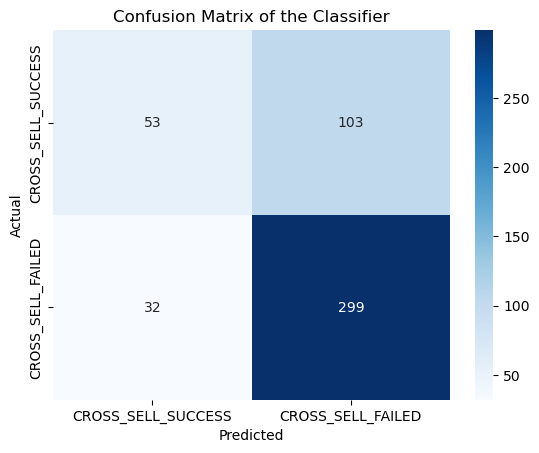

In [606]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['CROSS_SELL_SUCCESS', 'CROSS_SELL_FAILED'])

In [607]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6215


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> Using Tree Pruned</strong><br>

In [683]:

# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_two']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = cross_sell_target)


#INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth        = 8,
                                     min_samples_leaf = 150,
                                     random_state     = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)
model_gap = abs(model_train_score - model_test_score).round(4)



# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                         y_score = tree_pruned_pred).round(4))
print('Train-Test Gap   :', model_gap)


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.7121
Testing  ACCURACY: 0.7125
AUC Score        : 0.6225
Train-Test Gap   : 0.001


##### <hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> KNEIGHBORS </strong><br>

In [ ]:
#######################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1




In [ ]:
# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_one']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']


# this is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            cross_sell_data,
            cross_sell_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = cross_sell_target)

# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(cross_sell_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(cross_sell_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            cross_sell_target,
            random_state = 219,
            test_size    = 0.25,
            stratify     = cross_sell_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

In [ ]:
opt_neighbors = optimal_neighbors(x_data        = cross_sell_data,
                                  y_data        = cross_sell_target,
                                  response_type = 'class')

##### <hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>


<strong> GradientBoosting Tuner Classifier </strong><br>

In [ ]:
# INSTANTIATING the model object without hyperparameters
tuned_gbm = GradientBoostingClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_gbm_cv = RandomizedSearchCV(estimator             = tuned_gbm,      # model we are using
                                  param_distributions   = param_grid_GBM, # tuning options (dictionary)
                                  cv                    = 5,              # number of sets or folds we are going to build
                                  n_iter                = 100,            # maximum models to build 
                                  random_state          = 219)            # for replicating results


# FITTING to the FULL DATASET (due to cross-validation)
tuned_gbm_cv.fit(x_data, y_data)


# printing the optimal parameters and best score
print("Tuned Parameters:", tuned_gbm_cv.best_params_)
print("Tuned Training R-squared:", tuned_gbm_cv.best_score_.round(4))


In [665]:
# specifying a model name
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

model_name = 'GBC'

# train/test split with the full model
cross_sell_data   =  cross_sell.loc[ : , candidate_dict['set_one']]
cross_sell_target =  cross_sell.loc[ : , 'CROSS_SELL_SUCCESS']

# INSTANTIATING the model object
model = GradientBoostingClassifier(loss = 'exponential',
                                    n_estimators = 300,
                                    criterion = 'squared_error',
                                    min_samples_leaf = 1 ,
                                    max_depth = 1 ,
                                   random_state=219)

# FITTING the training data
model_fit = model.fit(x_train, y_train)

# PREDICTING based on the testing set
model_pred = model.predict(x_test)

# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score = model.score(x_test, y_test).round(4) # using R-square
model_auc_score = roc_auc_score(y_test, model_pred).round(4) # using AUC score
model_gap = abs(model_train_score - model_test_score).round(4)

# displaying results
print('Training Score:', model_train_score)
print('Testing Score:', model_test_score)
print('AUC Score:', model_auc_score)
print('Train-Test Gap:', model_gap)

Training Score: 0.7258
Testing Score: 0.7248
AUC Score: 0.623
Train-Test Gap: 0.001


In [ ]:
# predictions for x_test
tree_pruned.predict(x_test)
tree_pruned.predict_proba(x_test)

# probabilities of prediction for 1 (positive class)
predictions_cross_sell = pd.DataFrame(data = tree_pruned.predict_proba(x_test))

# renaming columns
predictions_cross_sell.columns = ['negative', 'positive']

predictions_cross_sell.loc[ : , 'positive']


# joining predictions with y_test
predictions_cross_sell.join(cross_sell.Series(y_test.reset_index(drop = True)))


# changing the prediction threshold

# placeholder column
predictions_df['predictions_at_60'] = 0


# looping to flag at 0.60 for positive class
for index, column in predictions_df.iterrows():
    
    if  predictions_df.loc[ index, 'positive' ] >= 0.60:
        predictions_df.loc[ index , 'predictions_at_60'] = 1
        

# outputting AUC score (p = 0.60 for positive class)
roc_auc_score(y_true  = y_test,
                        y_score = predictions_df['predictions_at_60']).round(4) # auc


# original AUC score (p = 0.50 for positive class)
roc_auc_score(y_true  = y_test,
                        y_score = tree_pruned_pred).round(4) # auc